**Data collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:11<00:00, 53.1MB/s]
100% 612M/612M [00:11<00:00, 57.9MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
os.chdir('/content/Train')
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)

/content/Train


In [ ]:
for i in range(classes):
   path = os.path.join(cur_path,str(i))
   images = os.listdir(path)
   for a in images:
    try:
      image = Image.open(path+'/'+a)
      image =  image.resize((64,64))
      image =  np.array(image)
      data.append(image)
      labels.append(i)
    except Exception as e:
        print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
data.shape, labels.shape

((39209, 64, 64, 3), (39209,))

**Visualizing data**

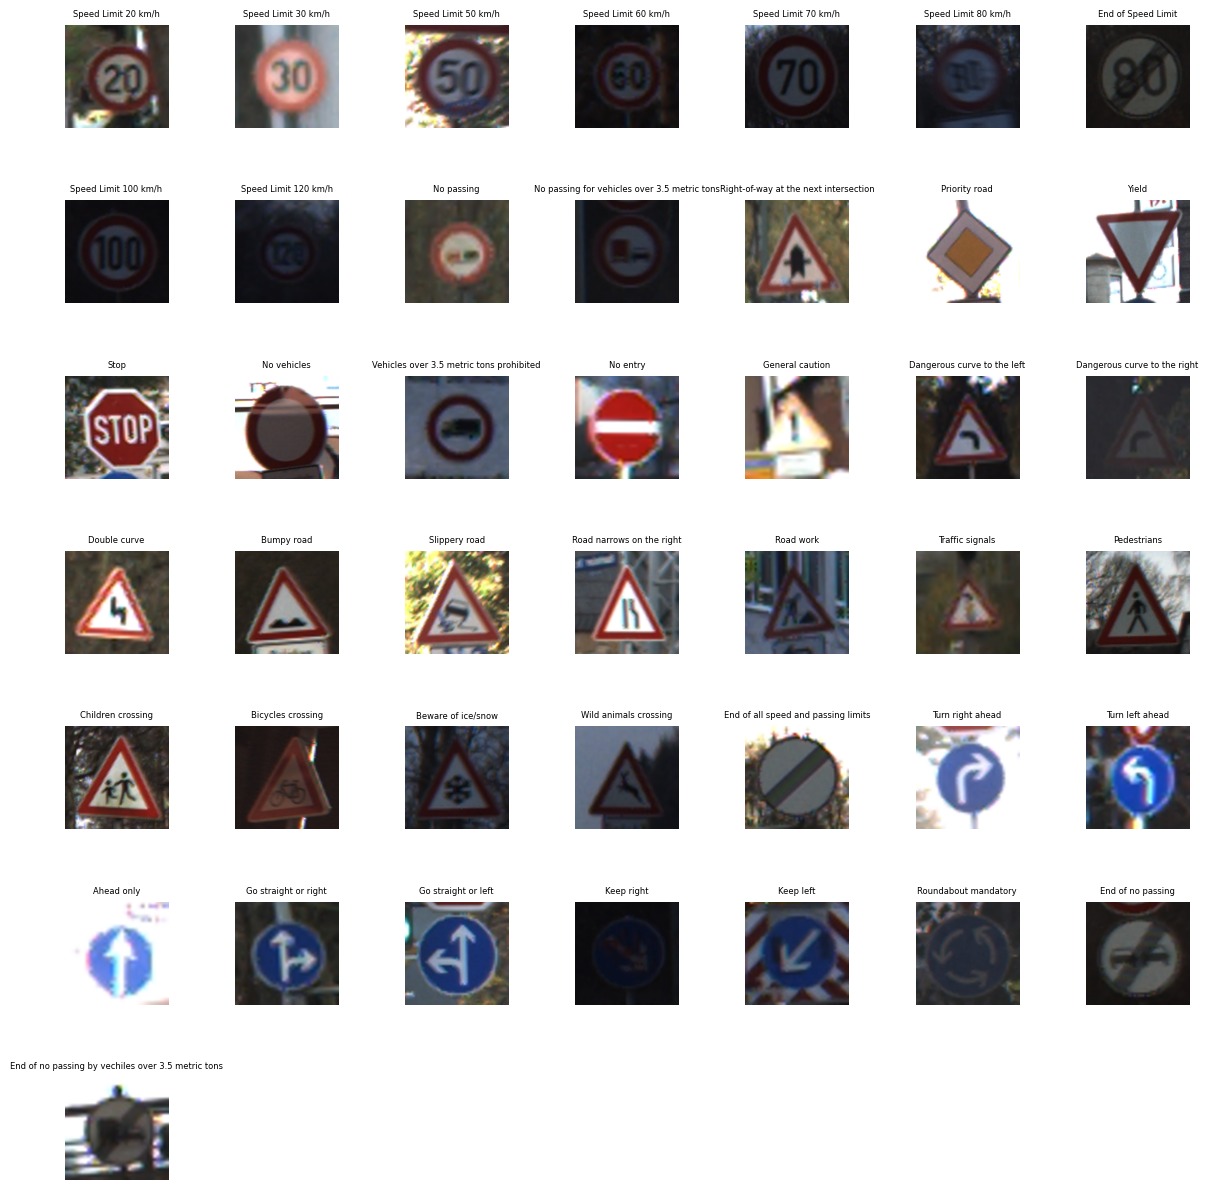

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' and 'labels' are defined as in the preceding code

# Get a unique sample from each class
unique_labels = np.unique(labels)
images_to_plot = []
for label in unique_labels:
  indices = np.where(labels == label)[0]
  image_index = indices[0]  # Take the first image from each class
  images_to_plot.append((data[image_index], label))

# Define the class descriptions (replace with your actual descriptions)
class_descriptions = [
    "Speed Limit 20 km/h", "Speed Limit 30 km/h", "Speed Limit 50 km/h",
    "Speed Limit 60 km/h", "Speed Limit 70 km/h", "Speed Limit 80 km/h",
    "End of Speed Limit", "Speed Limit 100 km/h", "Speed Limit 120 km/h",
    "No passing", "No passing for vehicles over 3.5 metric tons",
    "Right-of-way at the next intersection", "Priority road",
    "Yield", "Stop", "No vehicles", "Vehicles over 3.5 metric tons prohibited",
    "No entry", "General caution", "Dangerous curve to the left",
    "Dangerous curve to the right", "Double curve", "Bumpy road",
    "Slippery road", "Road narrows on the right", "Road work",
    "Traffic signals", "Pedestrians","Children crossing",
    "Bicycles crossing", "Beware of ice/snow", "Wild animals crossing",
    "End of all speed and passing limits", "Turn right ahead",
    "Turn left ahead", "Ahead only", "Go straight or right",
    "Go straight or left", "Keep right", "Keep left","Roundabout mandatory",
    "End of no passing", "End of no passing by vechiles over 3.5 metric tons"
]

# Plot the images
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(images_to_plot):
  plt.subplot(7, 7, i + 1)  # Adjust the subplot grid as needed
  plt.imshow(image)
  plt.title(class_descriptions[label],fontsize = 6)
  plt.axis('off')
plt.subplots_adjust(hspace = 0.7)

plt.show()


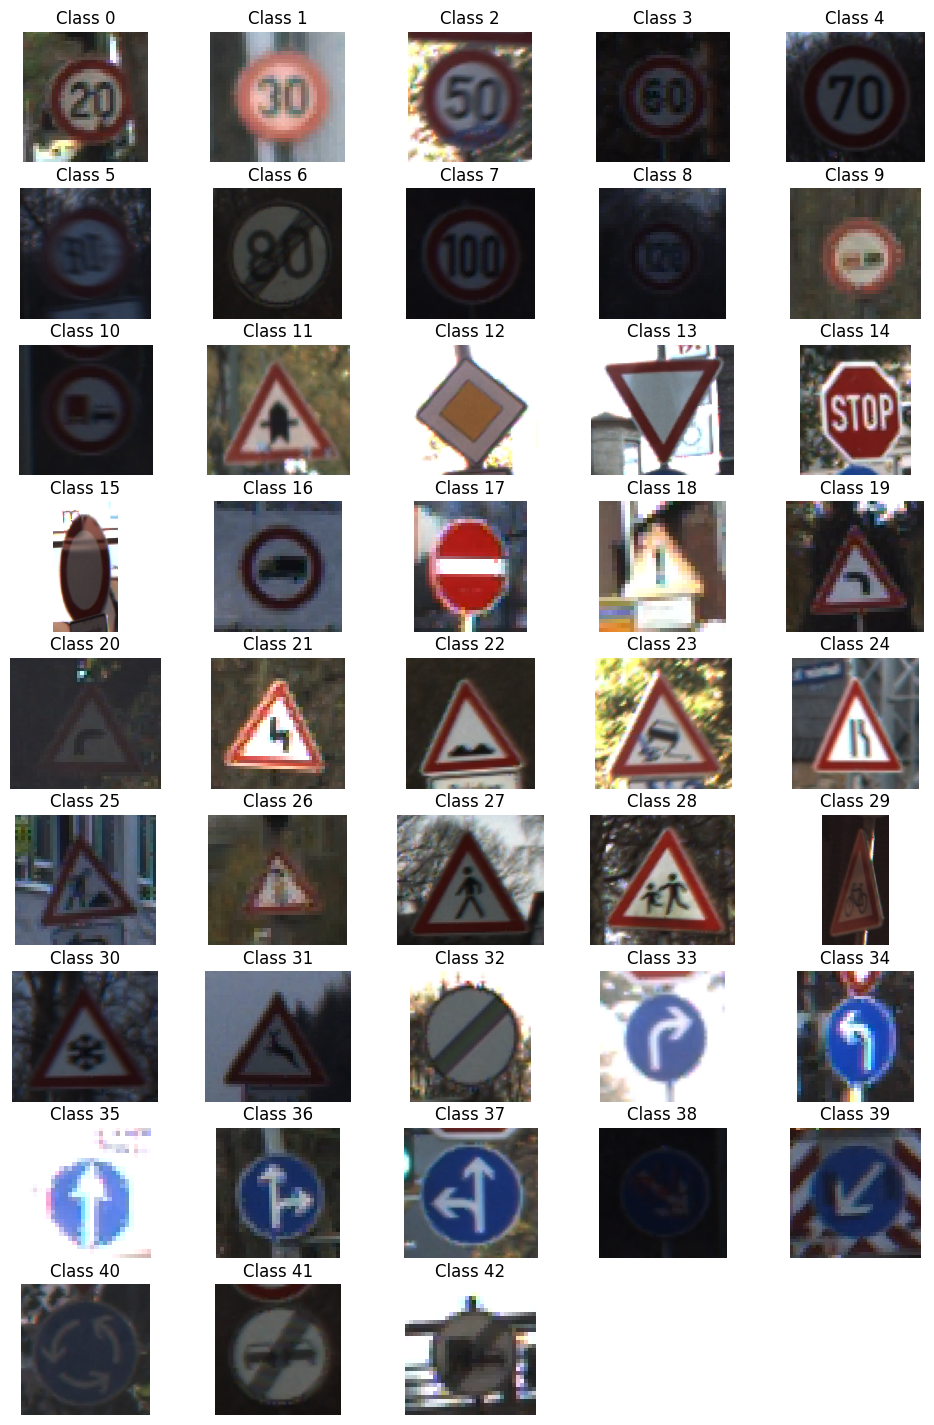

In [ ]:
plt.figure(figsize=(12, 20))
for i in range(43):
  os.chdir(f'/content/Train/{i}')
  img = plt.imread(os.listdir()[0])
  plt.subplot(10, 5, i+1) # 10 rows, 5 columns, ith subplot
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'Class {i}')
plt.show()


In [ ]:
#normalize pixel values
data = data / 255.0


**Data augmantation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# one hot encoding
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)




In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [ ]:
# Define the desired number of samples
desired_samples = 50000

# Store the initial training size
initial_train_size = len(X_train)

# Calculate the number of iterations needed
iterations = int(np.ceil((desired_samples - initial_train_size) / 7000))

# Apply data augmentation
for i in range(iterations):
    # Generate a batch of augmented images
    X_batch, y_batch = next(datagen.flow(X_train, y_train, batch_size=7000, shuffle=False))

    # Concatenate the augmented data to the original data
    X_train = np.concatenate((X_train, X_batch), axis=0)
    y_train = np.concatenate((y_train, y_batch), axis=0)

    print(f"After iteration {i+1}, X_train shape: {X_train.shape}")

    # Break the loop if the desired number of samples is reached
    if len(X_train) >= desired_samples:
        break



print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)


After iteration 1, X_train shape: (38367, 30, 30, 3)
After iteration 2, X_train shape: (45367, 30, 30, 3)
After iteration 3, X_train shape: (52367, 30, 30, 3)
Final X_train shape: (52367, 30, 30, 3)
Final y_train shape: (52367, 43)


**CNN training**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Define the model
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=43, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Evaluate the model on the test set
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_classes, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test_classes, y_pred, average='weighted')
print("Recall:", recall)

# Calculate AUC ROC
# Binarize the labels for ROC AUC calculation
y_test_bin = label_binarize(y_test_classes, classes=np.unique(y_test_classes))
y_pred_prob_bin = y_pred_prob

auc_roc = roc_auc_score(y_test_bin, y_pred_prob_bin, multi_class='ovr', average='weighted')
print("AUC ROC:", auc_roc)

# Calculate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred)
print("Confusion Matrix:\n", cm)

class_report = classification_report(y_test_classes, y_pred)
print("Classification Report:\n", class_report)


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Accuracy: 0.9905636317266003
Precision: 0.9906899959815739
Recall: 0.9905636317266003
AUC ROC: 0.9998939112834425
Confusion Matrix:
 [[ 38   0   0 ...   0   0   0]
 [  0 491   0 ...   0   0   0]
 [  0   6 432 ...   0   0   0]
 ...
 [  0   0   0 ...  60   0   0]
 [  0   0   0 ...   0  46   0]
 [  0   0   0 ...   0   0  41]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.99      0.99      0.99       496
           2       1.00      0.96      0.98       450
           3       0.98      1.00      0.99       280
           4       0.99      1.00      0.99       418
           5       0.98      0.95      0.97       364
           6       0.98      1.00      0.99        59
           7       0.97      1.00      0.98       278
           8       0.98      1.00      0.99       301
           9       1.00      1.00      1.00       268
          10  

**Test model**

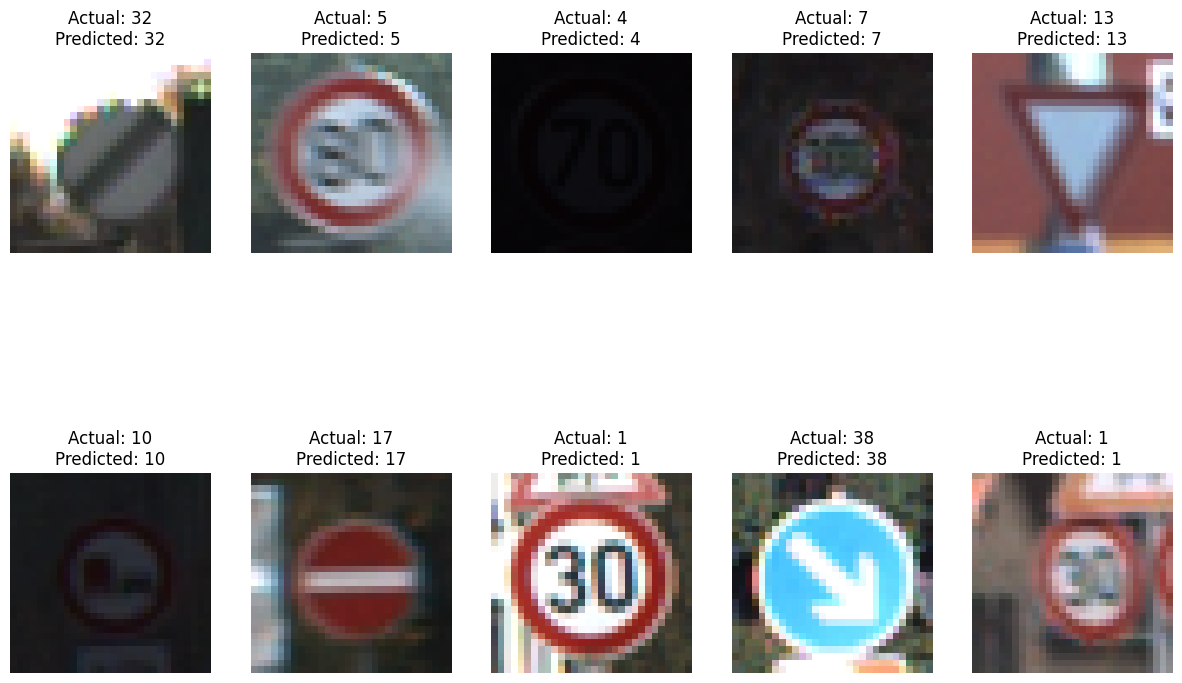

In [ ]:
import matplotlib.pyplot as plt

# Get a sample of test data and predictions
num_samples = 10  # Number of samples to visualize
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
actual_labels = y_test_classes[indices]
predicted_labels = y_pred[indices]

# Plot the images with actual and predicted labels
plt.figure(figsize=(15, 10))
for i in range(num_samples):
  plt.subplot(2, 5, i + 1)
  plt.imshow(sample_images[i])
  plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}")
  plt.axis('off')
plt.show()


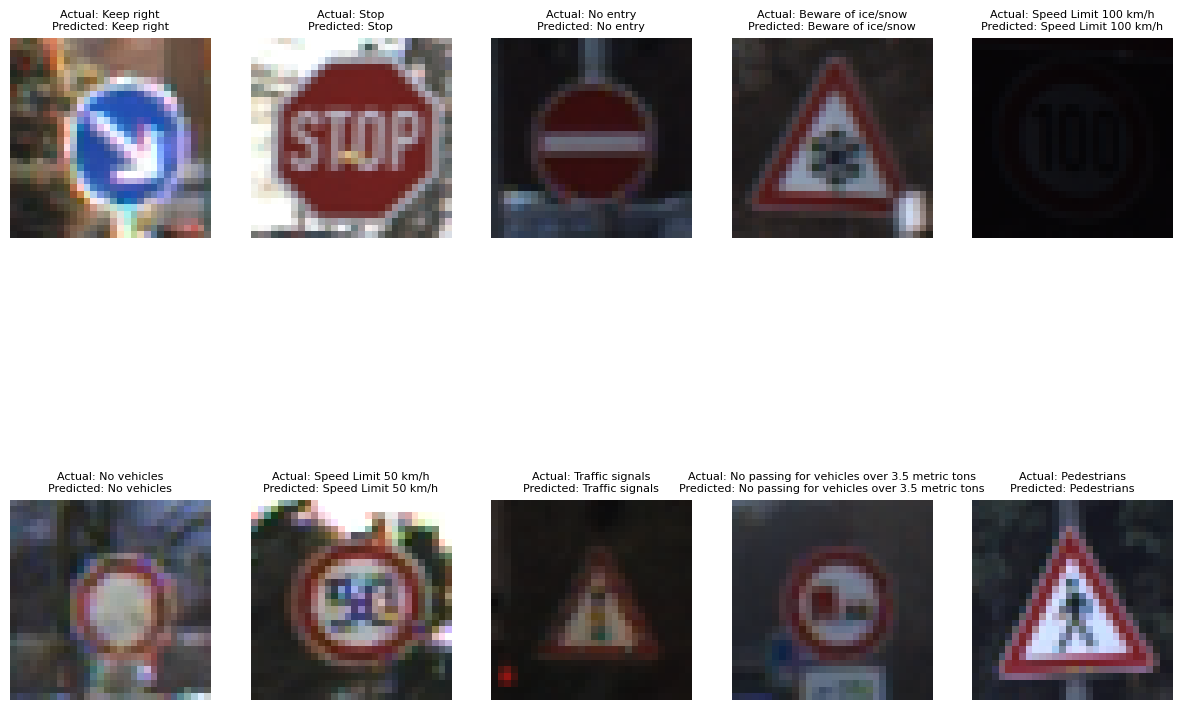

In [ ]:
# Get a sample of test data and predictions
num_samples = 10  # Number of samples to visualize
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
actual_labels = y_test_classes[indices]
predicted_labels = y_pred[indices]

# Plot the images with actual and predicted labels
plt.figure(figsize=(15, 10))
for i in range(num_samples):
  plt.subplot(2, 5, i + 1)
  plt.imshow(sample_images[i])
  plt.title(f"Actual: {class_descriptions[actual_labels[i]]}\nPredicted: {class_descriptions[predicted_labels[i]]}",fontsize = 8)
  plt.axis('off')
plt.subplots_adjust(hspace = 0.5)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


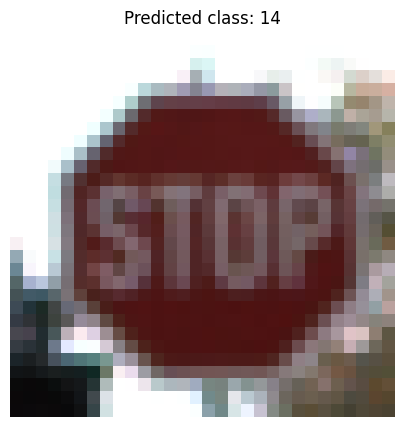

In [ ]:
# Load the image
image_path = '/content/Test/00353.png'  # Replace with the path to your new image
image = Image.open(image_path)
image = image.resize((30, 30))
image = np.array(image)
image = image / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)  # Add a batch dimension

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image[0])
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


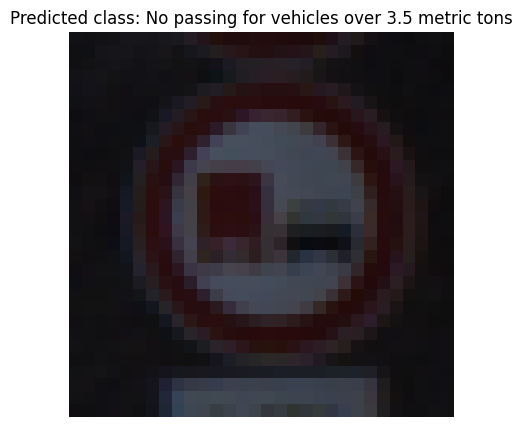

In [ ]:
image_path = '/content/Test/00359.png'  # Replace with the path to your new image
image = Image.open(image_path)
image = image.resize((30, 30))
image = np.array(image)
image = image / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)  # Add a batch dimension

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image[0])
plt.title(f"Predicted class: {class_descriptions[predicted_class]}")
plt.axis('off')
plt.show()


In [ ]:
# Save the model
model.save('traffic_sign_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


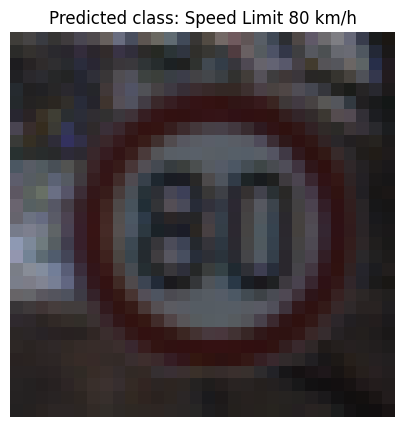

In [ ]:

loaded_model = load_model('traffic_sign_model.keras')

# Load the image
image_path = '/content/Test/00074.png'  # Replace with the path to your new image
image = Image.open(image_path)
image = image.resize((30, 30))
image = np.array(image)
image = image / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)  # Add a batch dimension

# Make a prediction using the loaded model
prediction = loaded_model.predict(image)
predicted_class = np.argmax(prediction)

# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image[0])
plt.title(f"Predicted class: {class_descriptions[predicted_class]}")
plt.axis('off')
plt.show()



In [ ]:
from google.colab import files
files.download('traffic_sign_model.keras')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>